In [110]:
# exploring binary classifiers on predicting patient attrition in the ART program with clinical data

In [111]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [112]:
df = pd.read_csv('patient_attrition_202411021350.csv')
df.head()

,patient_id,birthdate,gender,age,age_category,duration_on_treatment_in_yrs,side_effect_id,hypertension,avg_duration_bwtn_visits,vl_suppressed_status,regimen_category,current_med_adherence_rate,current_breastfeeding_status,current_pregnant_status,attrition_history,attrition_status
0,140950100390,1994-07-15,0,30,11-30,1,0,0,23,unknown,Standard,31.0,1.0,No,0,1
1,80370100390,1975-07-01,0,49,41-50,2,0,0,64,unknown,Standard,38.0,NaN,No,0,1
2,81370100390,1990-03-06,1,34,31-40,2,0,0,55,unknown,Standard,47.0,NaN,NaN,0,1
3,205080100114,1992-04-30,1,32,31-40,2,0,0,60,unknown,Standard,38.0,NaN,NaN,0,1
4,78460100390,1994-11-04,0,29,11-30,2,0,0,45,unknown,Standard,47.0,NaN,No,0,1


In [113]:
df.info()  # get overview of dataframe structure, we expect all our features to have int datatype of boolean nature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17674 entries, 0 to 17673
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    17674 non-null  int64  
 1   birthdate                     17674 non-null  object 
 2   gender                        17674 non-null  int64  
 3   age                           17674 non-null  int64  
 4   age_category                  17674 non-null  object 
 5   duration_on_treatment_in_yrs  17674 non-null  int64  
 6   side_effect_id                17674 non-null  int64  
 7   hypertension                  17674 non-null  int64  
 8   avg_duration_bwtn_visits      17674 non-null  int64  
 9   vl_suppressed_status          17674 non-null  object 
 10  regimen_category              17674 non-null  object 
 11  current_med_adherence_rate    12481 non-null  float64
 12  current_breastfeeding_status  2569 non-null   float64
 13  c

In [114]:
df.describe() # statistical summary of dataset
# df['Age'].describe()
# mask = df['Age'] < 0
# df[mask].head(100)

,patient_id,gender,age,duration_on_treatment_in_yrs,side_effect_id,hypertension,avg_duration_bwtn_visits,current_med_adherence_rate,current_breastfeeding_status,attrition_history,attrition_status
count,1.767400e+04,17674.000000,17674.000000,17674.000000,17674.0,17674.0,17674.000000,12481.000000,2569.0,17674.000000,17674.000000
mean,1.570206e+11,0.385708,40.265758,6.893120,0.0,0.0,39.990098,117.146543,1.0,0.147561,0.153389
std,2.308606e+11,0.486776,13.465302,3.826258,0.0,0.0,716.112985,276.705660,0.0,0.354675,0.360372
min,9.010027e+07,0.000000,1.000000,1.000000,0.0,0.0,-45568.000000,-167.000000,1.0,0.000000,0.000000
25%,1.034010e+10,0.000000,32.000000,4.000000,0.0,0.0,28.000000,79.000000,1.0,0.000000,0.000000
50%,2.859510e+10,0.000000,40.000000,6.000000,0.0,0.0,64.000000,94.000000,1.0,0.000000,0.000000
75%,2.039526e+11,1.000000,48.000000,9.000000,0.0,0.0,90.000000,100.000000,1.0,0.000000,0.000000
max,8.974501e+11,1.000000,234.000000,45.000000,0.0,0.0,1944.000000,8300.000000,1.0,1.000000,1.000000


In [115]:
df.drop('birthdate', axis=1, inplace=True) # age is a better variable here
df.drop('avg_duration_bwtn_visits', axis=1, inplace=True)      
df.head()

,patient_id,gender,age,age_category,duration_on_treatment_in_yrs,side_effect_id,hypertension,vl_suppressed_status,regimen_category,current_med_adherence_rate,current_breastfeeding_status,current_pregnant_status,attrition_history,attrition_status
0,140950100390,0,30,11-30,1,0,0,unknown,Standard,31.0,1.0,No,0,1
1,80370100390,0,49,41-50,2,0,0,unknown,Standard,38.0,NaN,No,0,1
2,81370100390,1,34,31-40,2,0,0,unknown,Standard,47.0,NaN,NaN,0,1
3,205080100114,1,32,31-40,2,0,0,unknown,Standard,38.0,NaN,NaN,0,1
4,78460100390,0,29,11-30,2,0,0,unknown,Standard,47.0,NaN,No,0,1


In [116]:
# check duplicates
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(f"There are {duplicate_count} duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

There are no duplicate rows in the DataFrame.


In [117]:
# handling missing values
print(df.isnull().sum()) 
df['current_med_adherence_rate'] = df['current_med_adherence_rate'].fillna(0)
df['current_breastfeeding_status'] = df['current_breastfeeding_status'].fillna(0)
df['current_pregnant_status'] = df['current_pregnant_status'].fillna(0)
print("\n" + "="*40 + "\n")
print(df.isnull().sum()) 

patient_id                          0
gender                              0
age                                 0
age_category                        0
duration_on_treatment_in_yrs        0
side_effect_id                      0
hypertension                        0
vl_suppressed_status                0
regimen_category                    0
current_med_adherence_rate       5193
current_breastfeeding_status    15105
current_pregnant_status          7228
attrition_history                   0
attrition_status                    0
dtype: int64


patient_id                      0
gender                          0
age                             0
age_category                    0
duration_on_treatment_in_yrs    0
side_effect_id                  0
hypertension                    0
vl_suppressed_status            0
regimen_category                0
current_med_adherence_rate      0
current_breastfeeding_status    0
current_pregnant_status         0
attrition_history               0
attrition_s

In [118]:
# Function handling outliers and illogical patient records
def delete_and_count(df, condition):
    original_count = df.shape[0]
    df = df[condition]
    new_count = df.shape[0]
    deleted_count = original_count - new_count
    return df, deleted_count

# Delete records where age >= 120
df, deleted_age_count = delete_and_count(df, df['age'] < 120)
print(f"Number of records deleted for age filter: {deleted_age_count}")

# Delete records where duration_on_treatment_in_yrs >= 20
df, deleted_duration_count = delete_and_count(df, df['duration_on_treatment_in_yrs'] < 20)
print(f"Number of records deleted for duration filter: {deleted_duration_count}")

# Remove pregnant males
df, deleted_pregnant_count = delete_and_count(df, ~((df['gender'] == 0) & (df['current_pregnant_status'] == 1)))
print(f"Number of records deleted for pregnant males filter: {deleted_pregnant_count}")

# Remove breastfeeding males
# df, deleted_breastfeeding_count = delete_and_count(df, ~((df['gender'] == 0) & (df['current_breastfeeding_status'] == 1)))
# print(f"Number of records deleted for breastfeeding males filter: {deleted_breastfeeding_count}")


Number of records deleted for age filter: 1
Number of records deleted for duration filter: 9
Number of records deleted for pregnant males filter: 0


In [119]:
# transform duration_on_treatment_in_yrs
if 'duration_on_treatment_in_yrs' in df.columns:
    df['short_term_treatment'] = df['duration_on_treatment_in_yrs'].apply(lambda x: 1 if x < 3 else 0)

if 'duration_on_treatment_in_yrs' in df.columns:
    df.drop(columns=['duration_on_treatment_in_yrs'], inplace=True)

df.head()

,patient_id,gender,age,age_category,side_effect_id,hypertension,vl_suppressed_status,regimen_category,current_med_adherence_rate,current_breastfeeding_status,current_pregnant_status,attrition_history,attrition_status,short_term_treatment
0,140950100390,0,30,11-30,0,0,unknown,Standard,31.0,1.0,No,0,1,1
1,80370100390,0,49,41-50,0,0,unknown,Standard,38.0,0.0,No,0,1,1
2,81370100390,1,34,31-40,0,0,unknown,Standard,47.0,0.0,0,0,1,1
3,205080100114,1,32,31-40,0,0,unknown,Standard,38.0,0.0,0,0,1,1
4,78460100390,0,29,11-30,0,0,unknown,Standard,47.0,0.0,No,0,1,1


In [120]:
# vl_suppressed_status transformations for binary classification compliance
df['vl_suppressed_status'].replace('unknown', 'unsuppressed', inplace=True)
df['vl_suppressed_status'] = df['vl_suppressed_status'].map({'unsuppressed': 0, 'suppressed': 1})
df['vl_suppressed_status'].fillna(0, inplace=True)
df['vl_suppressed_status'] = df['vl_suppressed_status'].astype('int64')
print(df.dtypes)
# df.describe()

patient_id                        int64
gender                            int64
age                               int64
age_category                     object
side_effect_id                    int64
hypertension                      int64
vl_suppressed_status              int64
regimen_category                 object
current_med_adherence_rate      float64
current_breastfeeding_status    float64
current_pregnant_status          object
attrition_history                 int64
attrition_status                  int64
short_term_treatment              int64
dtype: object


In [121]:
# current_pregnant_status transformations for binary classification compliance
df['current_pregnant_status'] = df['current_pregnant_status'].apply(lambda x: 1 if x == 'yes' else 0)
df['current_pregnant_status'] = df['current_pregnant_status'].astype('int64')
print(df.dtypes)

patient_id                        int64
gender                            int64
age                               int64
age_category                     object
side_effect_id                    int64
hypertension                      int64
vl_suppressed_status              int64
regimen_category                 object
current_med_adherence_rate      float64
current_breastfeeding_status    float64
current_pregnant_status           int64
attrition_history                 int64
attrition_status                  int64
short_term_treatment              int64
dtype: object


In [122]:
# current_breastfeeding_status transformations for binary classification compliance
df['current_breastfeeding_status'] = df['current_breastfeeding_status'].apply(lambda x: 1 if x == 'yes' else 0)
df['current_breastfeeding_status'] = df['current_breastfeeding_status'].astype('int64')
print(df.dtypes)

patient_id                        int64
gender                            int64
age                               int64
age_category                     object
side_effect_id                    int64
hypertension                      int64
vl_suppressed_status              int64
regimen_category                 object
current_med_adherence_rate      float64
current_breastfeeding_status      int64
current_pregnant_status           int64
attrition_history                 int64
attrition_status                  int64
short_term_treatment              int64
dtype: object


In [123]:
# regimen_category transformations for binary classification compliance
df['regimen_category'] = df['regimen_category'].apply(lambda x: 1 if x == 'standard' else 0)
df['regimen_category'] = df['regimen_category'].astype('int64')
print(df.dtypes)

patient_id                        int64
gender                            int64
age                               int64
age_category                     object
side_effect_id                    int64
hypertension                      int64
vl_suppressed_status              int64
regimen_category                  int64
current_med_adherence_rate      float64
current_breastfeeding_status      int64
current_pregnant_status           int64
attrition_history                 int64
attrition_status                  int64
short_term_treatment              int64
dtype: object


In [124]:
df.head(10)

,patient_id,gender,age,age_category,side_effect_id,hypertension,vl_suppressed_status,regimen_category,current_med_adherence_rate,current_breastfeeding_status,current_pregnant_status,attrition_history,attrition_status,short_term_treatment
0,140950100390,0,30,11-30,0,0,0,0,31.0,0,0,0,1,1
1,80370100390,0,49,41-50,0,0,0,0,38.0,0,0,0,1,1
2,81370100390,1,34,31-40,0,0,0,0,47.0,0,0,0,1,1
3,205080100114,1,32,31-40,0,0,0,0,38.0,0,0,0,1,1
4,78460100390,0,29,11-30,0,0,0,0,47.0,0,0,0,1,1
5,55590100591,0,38,31-40,0,0,0,0,51.0,0,0,0,1,1
6,55840100591,1,42,41-50,0,0,0,0,18.0,0,0,0,1,1
7,57400100591,1,7,0-10,0,0,0,0,4.0,0,0,0,1,1
8,77560100390,0,25,11-30,0,0,0,0,41.0,0,0,0,1,1
9,79280100390,0,20,11-20,0,0,0,0,53.0,0,0,0,1,1


[0 1] [14953  2711]


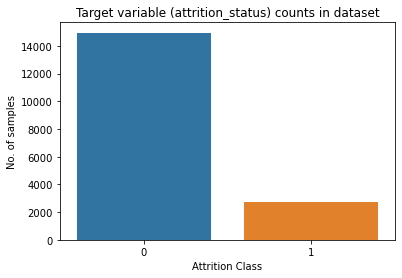

In [125]:
# shows how many samples are in class 0(No) and class 1(Yes)
# check whether target variable is balanced or unbalanced & if there is need to account for the imbalance when training our model.

(unique, counts) = np.unique(df['attrition_status'], return_counts=True)
print(unique, counts)

sns.barplot(x=unique, y=counts)
plt.xlabel("Attrition Class")
plt.ylabel("No. of samples")
plt.xticks()
plt.title("Target variable (attrition_status) counts in dataset")
plt.show()

time.sleep(1)
# df = df.drop(columns=['attrition_status'])

In [126]:
# Analysis results (balanced or unbalanced) given cell [56] above

# Total Instances: The total number of instances is the sum of both counts:
# 12846 + 2255 = 15091

# proportion of class 0: 12846/15091 = 0.85
# proportion of class 1: 2255//15091 = 0.15

# This is clearly an unbalanced dataset and may lead to bias especially on minority class (1)
# Consider performance metrics like precision, recall, and F1-score that are more informative in the context of class imbalance


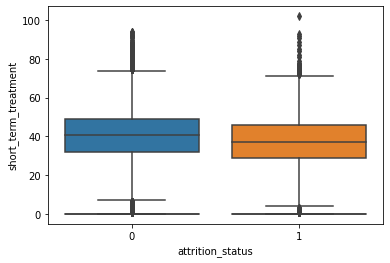

In [127]:
# Outliers
age_hist = sns.boxplot(x="attrition_status", y="age", data=df)
duration_hist = sns.boxplot(x="attrition_status", y="short_term_treatment", data=df)


In [128]:
# Left Box Plot - Age by Attrition Status:

# The median age appears to be similar across both attrition_status categories (0 and 1).
# There are a significant number of outliers in both categories, indicating some individuals are much younger or older than the typical age range.
# The spread of ages for each category appears comparable, although the exact differences in central tendency or spread aren’t shown here.

# Right Box Plot - Duration on Treatment by Attrition Status:
# Individuals in both attrition_status categories have similar median treatment durations.
# There is a wide range of treatment durations, with many outliers, especially for category 0. This suggests that some individuals in category 0 have been on treatment for a significantly longer duration than the typical range.
# The IQR (box height) appears somewhat larger for one category, indicating a wider spread in the duration for that group.

# Both age and treatment duration show outliers across attrition_status categories, suggesting variability within each group.
# Median values for age and treatment duration do not show significant differences between the attrition_status groups
# Both age and treatment duration show outliers across attrition_status categories, suggesting variability within each group.
# Median values for age and treatment duration do not show significant differences between the attrition_status groups, but further statistical testing would be needed to confirm this observation.

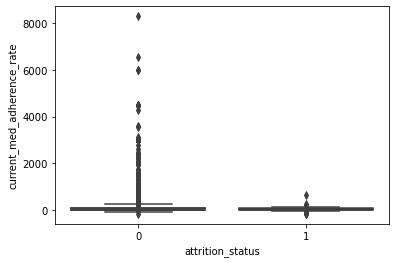

In [129]:
attrition_history = sns.boxplot(x="attrition_status", y="attrition_history", data=df)
duration_hist = sns.boxplot(x="attrition_status", y="current_med_adherence_rate", data=df)

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'side_effect_id'}>],
       [<AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'vl_suppressed_status'}>,
        <AxesSubplot:title={'center':'regimen_category'}>],
       [<AxesSubplot:title={'center':'current_med_adherence_rate'}>,
        <AxesSubplot:title={'center':'current_breastfeeding_status'}>,
        <AxesSubplot:title={'center':'current_pregnant_status'}>],
       [<AxesSubplot:title={'center':'attrition_history'}>,
        <AxesSubplot:title={'center':'attrition_status'}>,
        <AxesSubplot:>]], dtype=object)

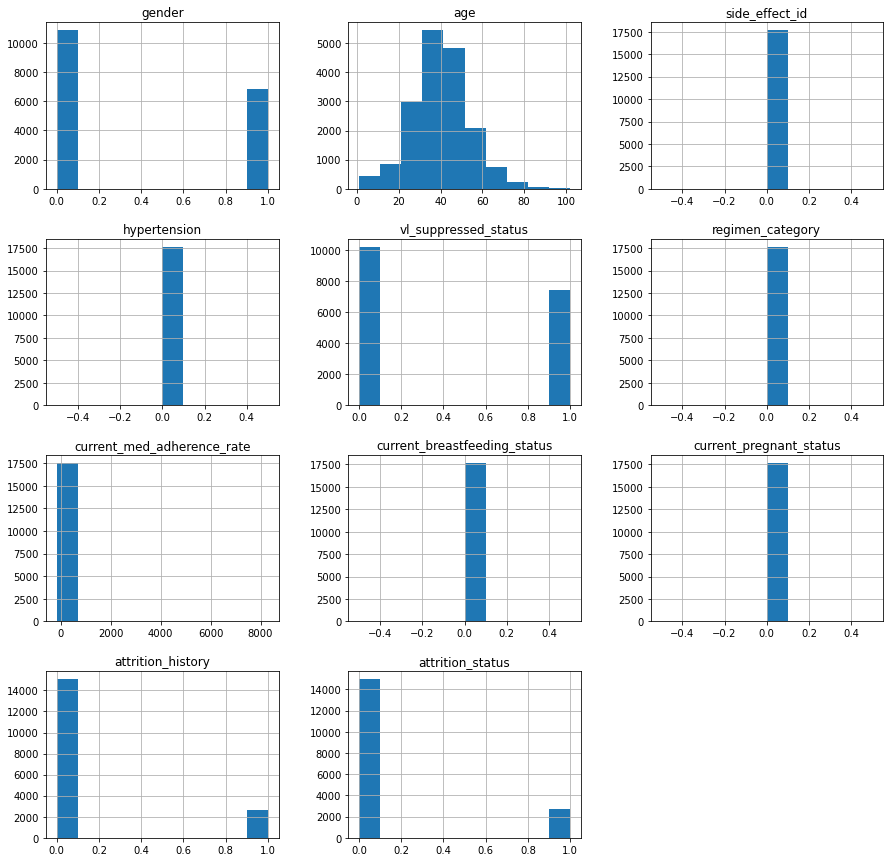

In [130]:
df_main = df.loc[:,'gender':'attrition_status']
df_main.hist(figsize=(15,15))

In [131]:
# Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode age_category                  
# df['age'] = le.fit_transform(df['age'])
# df['location'] = le.fit_transform(df['location'])


# Apply one-hot encoding to the age_category column
if 'age_category' in df.columns:
    df = pd.get_dummies(df, columns=['age_category'], prefix='age')
else:
    pass

# transform medication adherence
if 'current_med_adherence_rate' in df.columns:
    df['low_adherence'] = df['current_med_adherence_rate'].apply(lambda x: 1 if x < 68 else 0)
else:
    pass

print(df[['current_med_adherence_rate', 'low_adherence']].head())
df.head(10)


   current_med_adherence_rate  low_adherence
0                        31.0              1
1                        38.0              1
2                        47.0              1
3                        38.0              1
4                        47.0              1


,patient_id,gender,age,side_effect_id,hypertension,vl_suppressed_status,regimen_category,current_med_adherence_rate,current_breastfeeding_status,current_pregnant_status,attrition_history,attrition_status,short_term_treatment,age_0-10,age_11-20,age_11-30,age_31-40,age_41-50,age_>50,low_adherence
0,140950100390,0,30,0,0,0,0,31.0,0,0,0,1,1,0,0,1,0,0,0,1
1,80370100390,0,49,0,0,0,0,38.0,0,0,0,1,1,0,0,0,0,1,0,1
2,81370100390,1,34,0,0,0,0,47.0,0,0,0,1,1,0,0,0,1,0,0,1
3,205080100114,1,32,0,0,0,0,38.0,0,0,0,1,1,0,0,0,1,0,0,1
4,78460100390,0,29,0,0,0,0,47.0,0,0,0,1,1,0,0,1,0,0,0,1
5,55590100591,0,38,0,0,0,0,51.0,0,0,0,1,1,0,0,0,1,0,0,1
6,55840100591,1,42,0,0,0,0,18.0,0,0,0,1,1,0,0,0,0,1,0,1
7,57400100591,1,7,0,0,0,0,4.0,0,0,0,1,1,1,0,0,0,0,0,1
8,77560100390,0,25,0,0,0,0,41.0,0,0,0,1,1,0,0,1,0,0,0,1
9,79280100390,0,20,0,0,0,0,53.0,0,0,0,1,1,0,1,0,0,0,0,1


In [132]:
# drop unnecesary columns
columns_to_drop = ['age', 'age_category', 'current_med_adherence_rate']

for col in columns_to_drop:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True, errors='ignore')

# Rearrange the final DataFrame to place 'attrition_status' at the end {target variable}
features = df.columns.tolist()  
features.remove('attrition_status')  
features.append('attrition_status') 

# Reorder the DataFrame
df = df[features]
df.head(10)

,patient_id,gender,side_effect_id,hypertension,vl_suppressed_status,regimen_category,current_breastfeeding_status,current_pregnant_status,attrition_history,short_term_treatment,age_0-10,age_11-20,age_11-30,age_31-40,age_41-50,age_>50,low_adherence,attrition_status
0,140950100390,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1
1,80370100390,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
2,81370100390,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,205080100114,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
4,78460100390,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1
5,55590100591,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
6,55840100591,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
7,57400100591,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1
8,77560100390,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1
9,79280100390,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1


Text(0.5, 1.0, 'Correlation Heatmap of DataFrame')

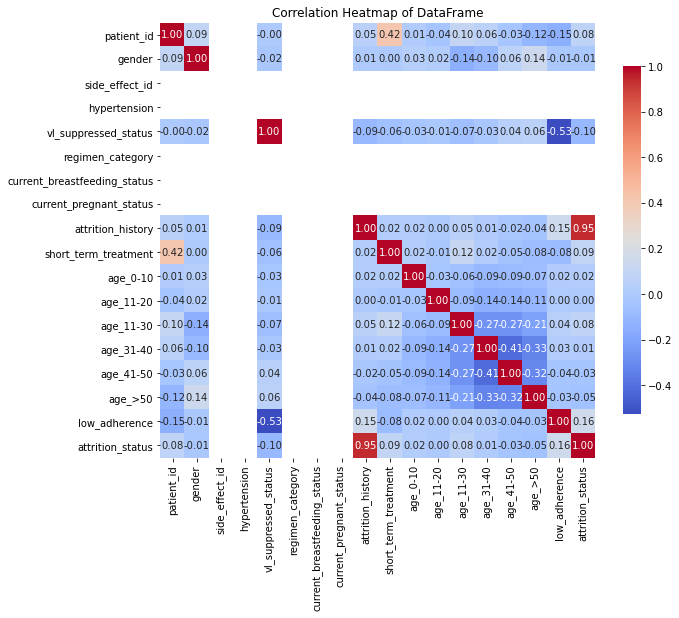

In [133]:
# correlation -REVISE*******

# corr = X.corr()
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of DataFrame')

In [134]:
# divide dataset into X and Y, Where X = all the features and Y = target variable(potential_attrition_status)
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [135]:
# divide dataset into training and testing datasets and pass the values of X and Y
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=42)

print("\nValue Counts for Training Target Variable (Y_train):")
print(Y_train.value_counts())

# Print statistics for the validation target variable
print("\nValue Counts for Validation Target Variable (Y_val):")
print(Y_val.value_counts())


Value Counts for Training Target Variable (Y_train):
0    11945
1     2186
Name: attrition_status, dtype: int64

Value Counts for Validation Target Variable (Y_val):
0    3008
1     525
Name: attrition_status, dtype: int64


In [136]:
# revised version: modified version for handling inbalanced data
# resolved ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score, classification_report, roc_curve, confusion_matrix

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(max_iter=200)

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC(max_iter=200)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# XGBoost
from xgboost import XGBClassifier
models['xgboost'] = XGBClassifier(max_iter=200)

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    # Fit classifier model
    models[key].fit(X_train, Y_train)
    
    # Prediction
    predictions = models[key].predict(X_val)
    
    # Calculate Accuracy, Precision, Recall metrics 
    accuracy[key] = accuracy_score(Y_val, predictions)
    precision[key] = precision_score(Y_val, predictions, zero_division=1)  # Set zero_division
    recall[key] = recall_score(Y_val, predictions, zero_division=1)  # Set zero_division

    print('Classification Report for', key)
    print(classification_report(Y_val, predictions, zero_division=1))  # Set zero_division

    # Check if Y_val contains more than one class
    if len(np.unique(Y_val)) > 1:
        # Calculate AUC score only if both classes exist
        auc = roc_auc_score(Y_val, predictions)
        print('ROC_AUC_SCORE is', auc)
    else:
        print(f'Skipping ROC AUC calculation for {key} as only one class is present in Y_val.')


Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3008
           1       1.00      0.00      0.00       525

    accuracy                           0.85      3533
   macro avg       0.93      0.50      0.46      3533
weighted avg       0.87      0.85      0.78      3533

ROC_AUC_SCORE is 0.5
Classification Report for Support Vector Machines
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3008
           1       1.00      0.00      0.00       525

    accuracy                           0.85      3533
   macro avg       0.93      0.50      0.46      3533
weighted avg       0.87      0.85      0.78      3533

ROC_AUC_SCORE is 0.5
Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3008
           1       0.94      0.94      0.94       525

    

In [137]:
# creates a DataFrame df_model to store the accuracy, precision, and recall values for each machine learning model, with models as the index and the respective metric values as columns
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

# add ROC_AUC_SCORE on df_model 

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.851401,1.000000,0.000000
Support Vector Machines,0.851401,1.000000,0.000000
Random Forest,0.981602,0.937262,0.939048
Naive Bayes,0.851401,1.000000,0.000000
xgboost,0.985282,0.952199,0.948571


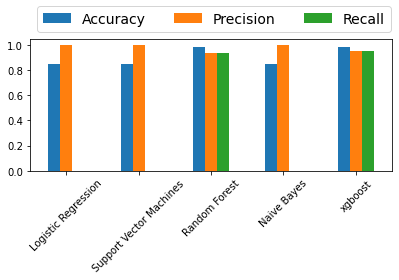

In [138]:
# plt.figure(figsize=(24, 18))
ax = df_model.plot.bar(rot=45)
ax.legend(ncol=len(models.keys()), bbox_to_anchor=(0,1), loc='lower left', prop={'size':14})
plt.tight_layout()

In [139]:
# clearly Model X is has the highest ....